In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = '/content/WHO-COVID-19-global-data.csv'
df = pd.read_csv(data_path)

In [6]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [7]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.066780e+05,3.066780e+05,306678.000000,3.066780e+05
mean,2.505031e+03,1.376457e+06,22.667674,1.743987e+04
std,4.042920e+04,6.365556e+06,344.525081,7.383136e+04
min,-1.105466e+06,0.000000e+00,-120896.000000,0.000000e+00
25%,0.000000e+00,1.939000e+03,0.000000,1.500000e+01
50%,1.000000e+00,3.314450e+04,0.000000,3.650000e+02
75%,1.910000e+02,3.832040e+05,2.000000,5.635000e+03
max,6.966046e+06,1.034368e+08,120896.000000,1.127152e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306678 entries, 0 to 306677
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      306678 non-null  object
 1   Country_code       305384 non-null  object
 2   Country            306678 non-null  object
 3   WHO_region         306678 non-null  object
 4   New_cases          306678 non-null  int64 
 5   Cumulative_cases   306678 non-null  int64 
 6   New_deaths         306678 non-null  int64 
 7   Cumulative_deaths  306678 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ MB


In [14]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

## **Pre - Procesamiento **

In [9]:
# Verifico si hay datos faltantes
print(df.isnull().sum())


Date_reported           0
Country_code         1294
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64


In [10]:
df['Country_code'].fillna(method='ffill', inplace=True)

In [11]:
# Verificamos si hay datos faltantes
print(df.isnull().sum())

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [12]:
# Cambimos a formato Fecha
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

## **Analisis de Datos**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306678 entries, 0 to 306677
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      306678 non-null  datetime64[ns]
 1   Country_code       306678 non-null  object        
 2   Country            306678 non-null  object        
 3   WHO_region         306678 non-null  object        
 4   New_cases          306678 non-null  int64         
 5   Cumulative_cases   306678 non-null  int64         
 6   New_deaths         306678 non-null  int64         
 7   Cumulative_deaths  306678 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 18.7+ MB


In [25]:
df.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [16]:
# Selecciono el período de tiempo para el análisis (por ejemplo, últimos 7 días)
end_date = df['Date_reported'].max()
start_date = end_date - pd.Timedelta(days=7)

In [17]:
# Filtro los datos por el período seleccionado
df_selected_period = df[(df['Date_reported'] >= start_date) & (df['Date_reported'] <= end_date)]


In [18]:
# Agrupo los datos por país y calcular el crecimiento relativo de casos nuevos
df_growth = df_selected_period.groupby('Country').agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'first'
}).reset_index()


In [19]:
df_growth['Growth_rate'] = (df_growth['New_cases'] / df_growth['Cumulative_cases']) * 100

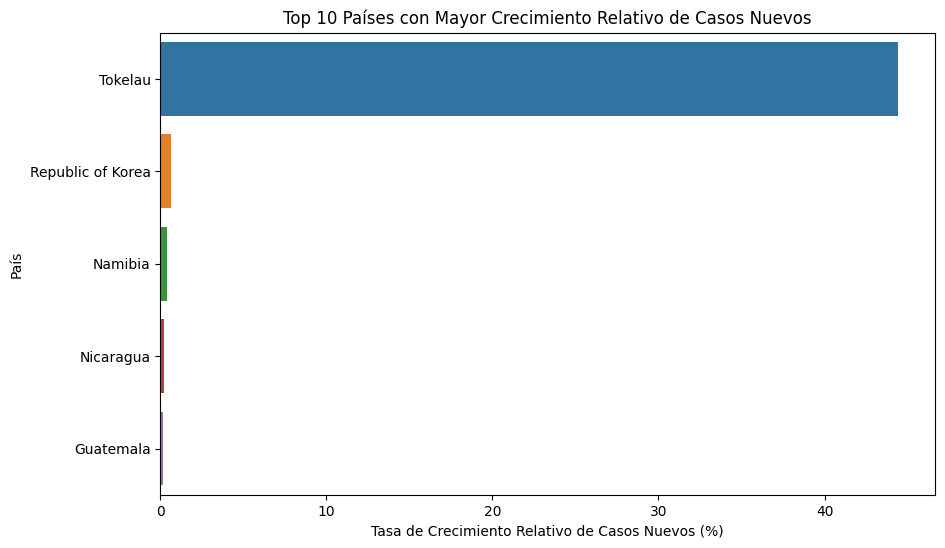

In [22]:
# Visualizo los países con las mayores tasas de crecimiento relativo
df_growth_top_countries = df_growth.nlargest(5, 'Growth_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='Growth_rate', y='Country', data=df_growth_top_countries)
plt.xlabel('Tasa de Crecimiento Relativo de Casos Nuevos (%)')
plt.ylabel('País')
plt.title('Top 5 Países con Mayor Crecimiento Relativo de Casos Nuevos')
plt.show()


In [23]:
# Selecciono el período de tiempo para el análisis (últimos 3 meses)
end_date = df['Date_reported'].max()
start_date = end_date - pd.DateOffset(months=3)

# Filtro los datos por el período seleccionado
df_selected_period = df[(df['Date_reported'] >= start_date) & (df['Date_reported'] <= end_date)]

# Agrupo los datos por país y calcular el crecimiento relativo de casos nuevos
df_growth = df_selected_period.groupby('Country').agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'first'
}).reset_index()

df_growth['Growth_rate'] = (df_growth['New_cases'] / df_growth['Cumulative_cases']) * 100

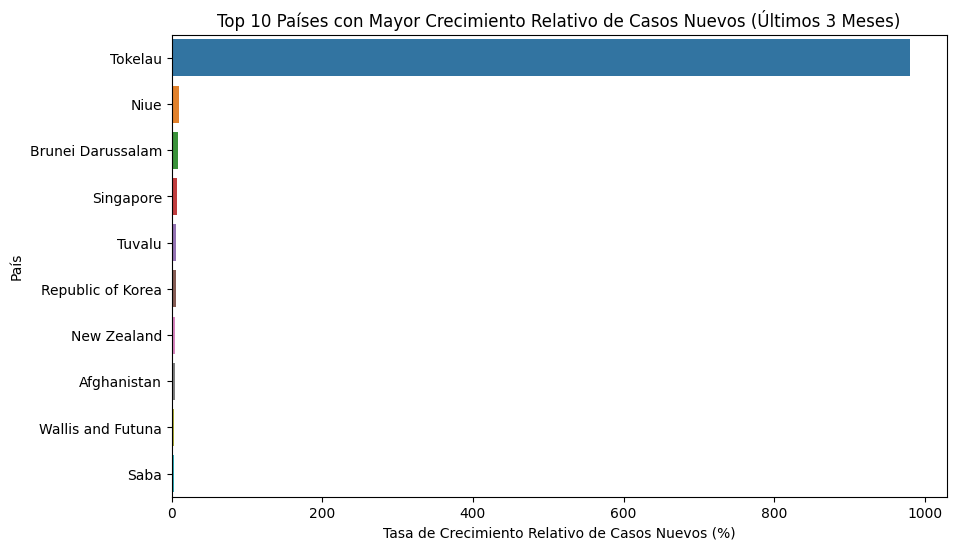

In [24]:
# Visualizo los países con las mayores tasas de crecimiento relativo
df_growth_top_countries = df_growth.nlargest(10, 'Growth_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='Growth_rate', y='Country', data=df_growth_top_countries)
plt.xlabel('Tasa de Crecimiento Relativo de Casos Nuevos (%)')
plt.ylabel('País')
plt.title('Top 10 Países con Mayor Crecimiento Relativo de Casos Nuevos (Últimos 3 Meses)')
plt.show()


<ipython-input-26-0e70dd1e926d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_region_trends = df.groupby(['WHO_region', 'Date_reported']).sum().reset_index()


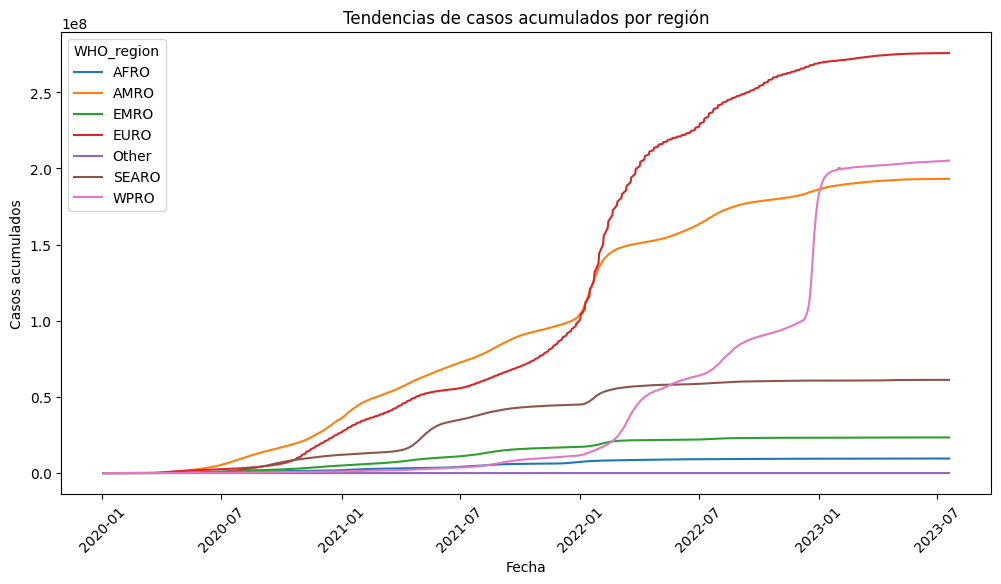

In [26]:
# Agrupo los datos por la columna "WHO_region"
df_region_trends = df.groupby(['WHO_region', 'Date_reported']).sum().reset_index()

# Gráfico de tendencias en diferentes regiones
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_region_trends, x='Date_reported', y='Cumulative_cases', hue='WHO_region')
plt.xlabel('Fecha')
plt.ylabel('Casos acumulados')
plt.title('Tendencias de casos acumulados por región')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-539c0b6ee022>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_totals = df.groupby('Country').sum().reset_index()


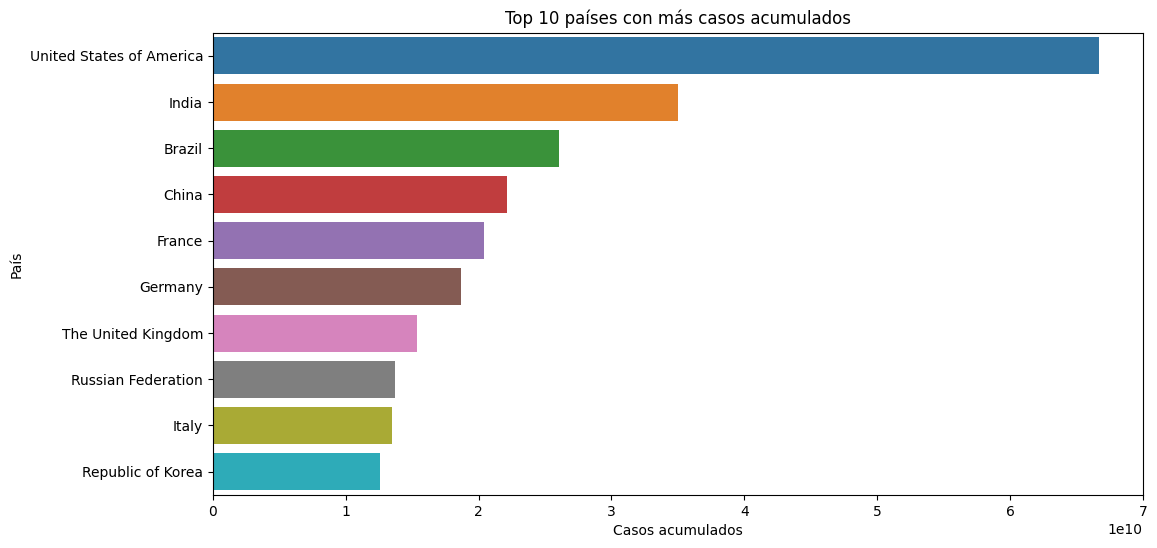

In [27]:
# Agrupo los datos por país y obtener los totales
df_country_totals = df.groupby('Country').sum().reset_index()

# Gráfico de barras para comparación de países
plt.figure(figsize=(12, 6))
sns.barplot(data=df_country_totals.nlargest(10, 'Cumulative_cases'), x='Cumulative_cases', y='Country')
plt.xlabel('Casos acumulados')
plt.ylabel('País')
plt.title('Top 10 países con más casos acumulados')
plt.show()


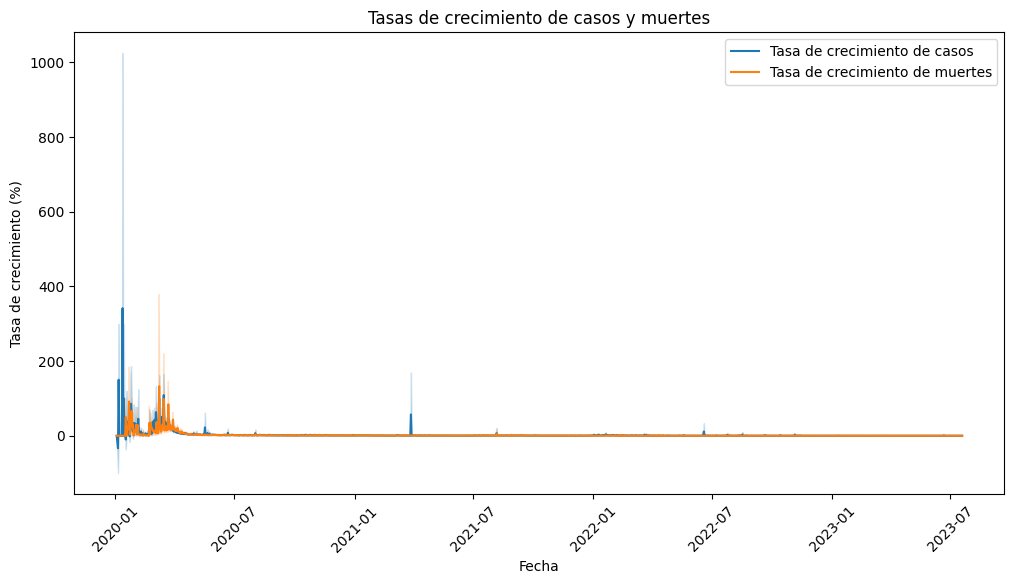

In [28]:
# Calculo la tasas de crecimiento de casos y muertes
df['Growth_rate_cases'] = df['New_cases'] / df['Cumulative_cases'].shift() * 100
df['Growth_rate_deaths'] = df['New_deaths'] / df['Cumulative_deaths'].shift() * 100

# Gráfico de tasas de crecimiento
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date_reported', y='Growth_rate_cases', label='Tasa de crecimiento de casos')
sns.lineplot(data=df, x='Date_reported', y='Growth_rate_deaths', label='Tasa de crecimiento de muertes')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento (%)')
plt.title('Tasas de crecimiento de casos y muertes')
plt.xticks(rotation=45)
plt.show()


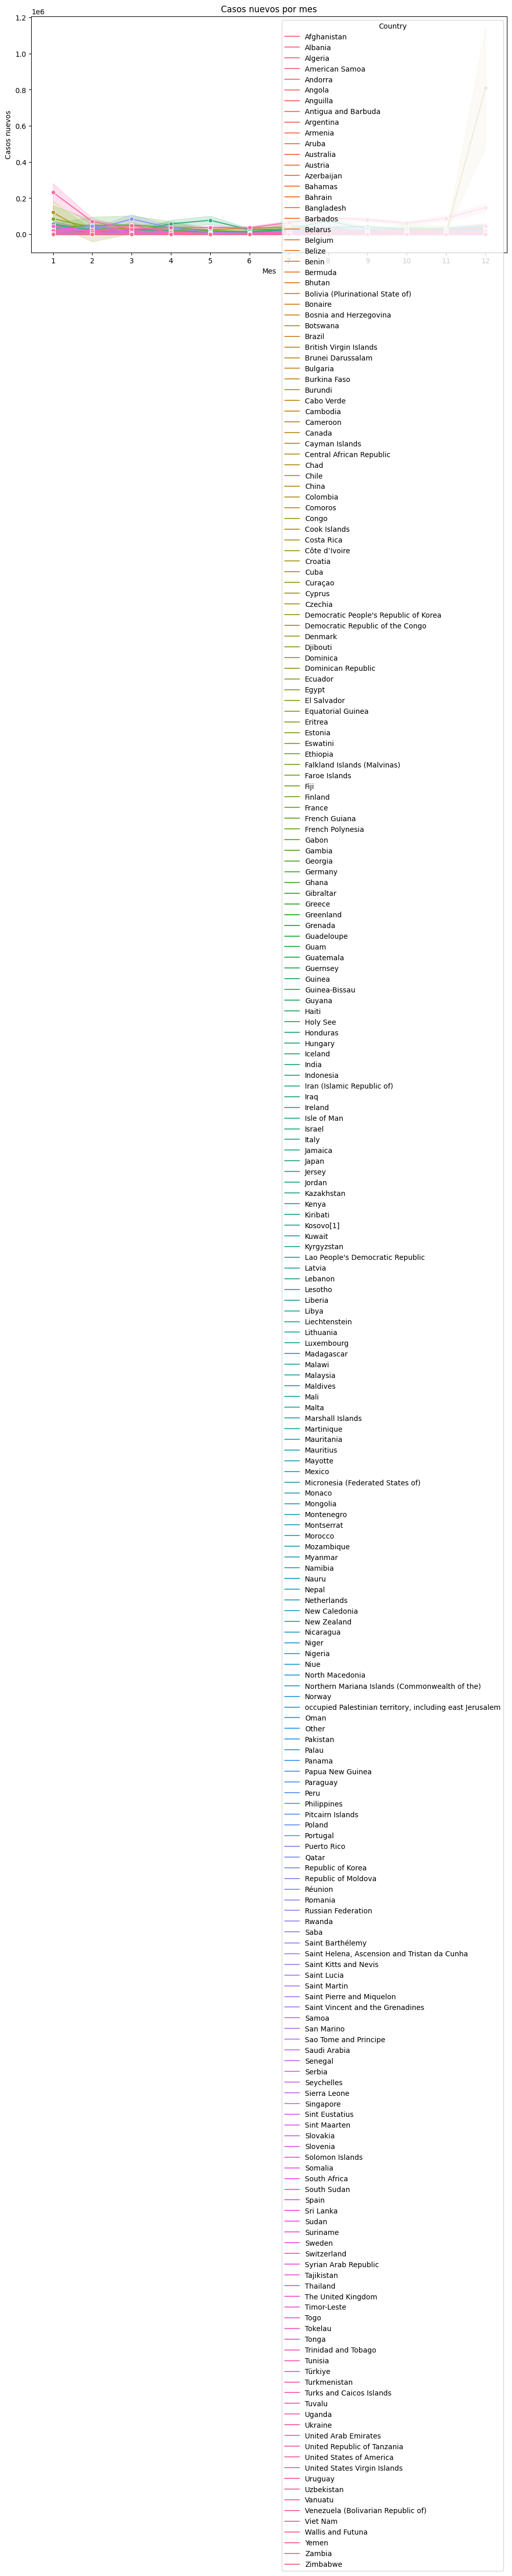

In [33]:
# Agrego una columna para el mes
df['Month'] = df['Date_reported'].dt.month

# Grafico de casos nuevos por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='New_cases', hue='Country', marker='o')
plt.xlabel('Mes')
plt.ylabel('Casos nuevos')
plt.title('Casos nuevos por mes')
plt.xticks(range(1, 13))  # Asegura que los meses se muestren correctamente en el eje x
plt.show()


<ipython-input-34-5061fd7e4770>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='New_cases', hue='Country', marker='o', ci=None)  # Desactiva el intervalo de confianza
<ipython-input-34-5061fd7e4770>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='New_deaths', hue='Country', marker='o', ci=None)  # Agrega una línea para muertes


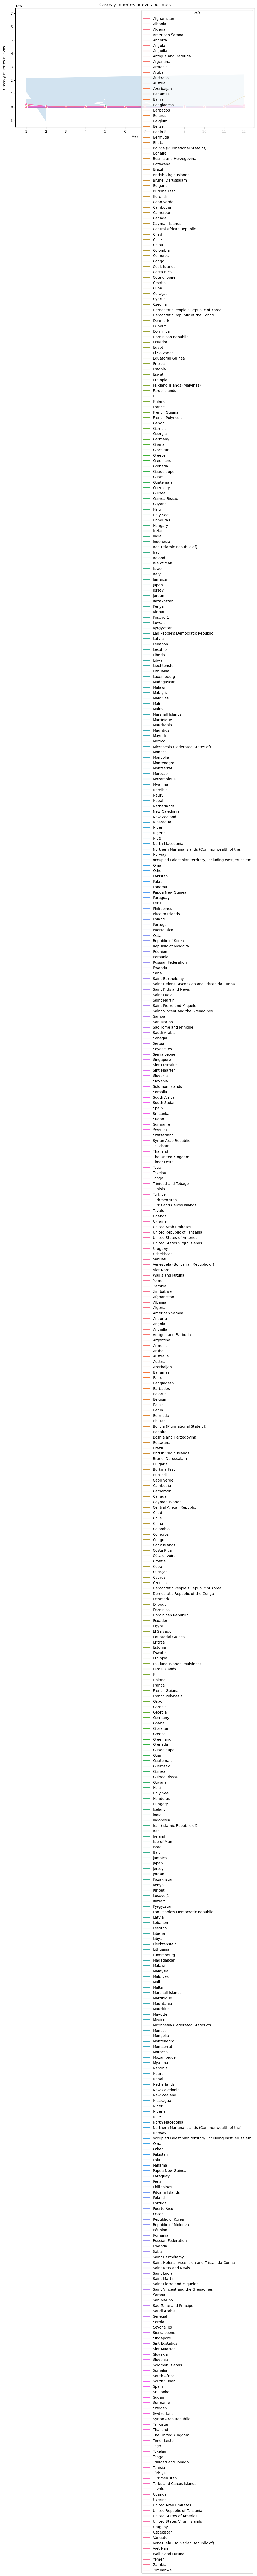

In [34]:
# Agrego una columna para el mes
df['Month'] = df['Date_reported'].dt.month
# Grafico de casos y muertes nuevos por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='New_cases', hue='Country', marker='o', ci=None)  # Desactiva el intervalo de confianza
sns.lineplot(data=df, x='Month', y='New_deaths', hue='Country', marker='o', ci=None)  # Agrega una línea para muertes
plt.fill_between(df['Month'], df['New_cases'], df['New_deaths'], alpha=0.2)  # Rellena el área entre las líneas
plt.xlabel('Mes')
plt.ylabel('Casos y muertes nuevos')
plt.title('Casos y muertes nuevos por mes')
plt.xticks(range(1, 13))  # Asegura que los meses se muestren correctamente en el eje x
plt.legend(title='País')
plt.show()

<ipython-input-31-15bfff87dbcb>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x600 with 0 Axes>

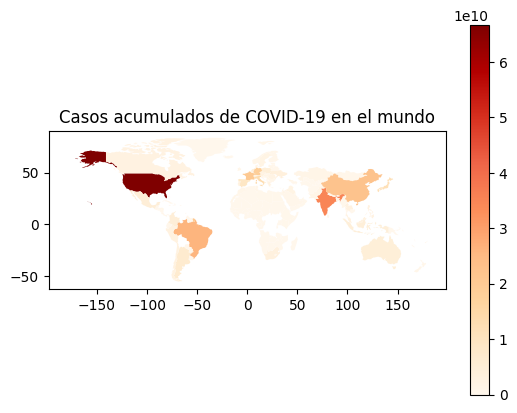

In [31]:
import geopandas as gpd

# Cargamos datos geoespaciales del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unimos datos COVID-19 con datos geoespaciales
df_geo = pd.merge(world, df_country_totals, left_on='name', right_on='Country')

# Gráfica de casos acumulados en un mapa
plt.figure(figsize=(12, 6))
df_geo.plot(column='Cumulative_cases', cmap='OrRd', legend=True)
plt.title('Casos acumulados de COVID-19 en el mundo')
plt.show()
